In [34]:
import cv2
import colorsys
import numpy as np
from skimage import morphology
from skimage.segmentation import flood, flood_fill
import matplotlib.pyplot as plt

In [93]:
def twoPassAlgo(im,flag): 
    h, w = im.shape
    label = np.zeros((h,w),dtype=np.uint16)
    label_cnt = 1
    for i in range(h):
        for j in range(w):
            if im[i, j] == 1:
                if im[i-1,j] or im[i,j-1] or im[i-1,j-1] or im[i-1,j+1]:
                    neigh = np.asarray([label[i-1,j], label[i,j-1], label[i-1,j-1], label[i-1,j+1]])
                    neigh = neigh[neigh > 0]
                    label[i,j] = neigh.min()
                    except_min = neigh[neigh != label[i,j]]
                    for l in except_min:
                        label[label == l] = label[i,j]
                else:
                    label_cnt += 1
                    label[i,j] = label_cnt

    uniques = np.unique(label)
    if(flag==1):
        for val in range(len(unique_vals)):
            label[label == uniques[val]] = val
    
    return label

In [96]:
def returnOneTwo(im,flag):
    th2 = cv2.adaptiveThreshold(im,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,6)
    if(flag==1):
        th2 = np.pad(th2, 3, mode='constant')
    th2[th2==255] = 1
    labels1 = twoPassAlgo(th2,1)
    regions = len(np.unique(labels1))
    lh,ly = labels1.shape[0:2]
    new = np.zeros((lh,ly,3))
    new[:,:,0] = labels1
    new[:,:,1] = labels1
    new[:,:,2] = labels1
    new = new.astype('uint8')
    # new = new*20
    plt.imshow(new,cmap='gray')

    for i in range(1,regions):
        new[labels1 == i] = np.array(colorsys.hsv_to_rgb(i/regions, 1, 1)) * 255

    plt.imshow(new)
    print("Components")

    comp = []
    holes = []
    


    for i in range(1,len(np.unique(labels1))):
        temp = np.zeros((lh,ly),dtype=np.uint16)
        for x in range(lh):
            for y in range(ly):
                if(labels1[x,y] == i):
                    temp[x,y] = 1

        comp.append(temp)
        temp_fill = flood_fill(temp, (0, 0), 1)
        temp_fill = np.invert(temp_fill.astype("bool")) * 1

        temp_labels = twoPassAlgo(temp_fill,0)
        num_holes = len(np.unique(temp_labels)) - 1
        holes.append(num_holes)

    onehole = []
    twohole = []

    for i in range(len(holes)):
        if(holes[i] == 1):
            onehole.append(comp[i])
        elif(holes[i]==2):
            twohole.append(comp[i])

    return onehole,twohole

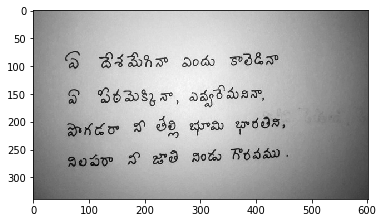

In [97]:
im = cv2.imread("../input_data/5_2a.jpeg",0)
plt.imshow(im,cmap='gray')

Components


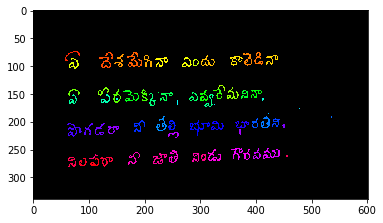

In [98]:
onehole,twohole = returnOneTwo(im,0)

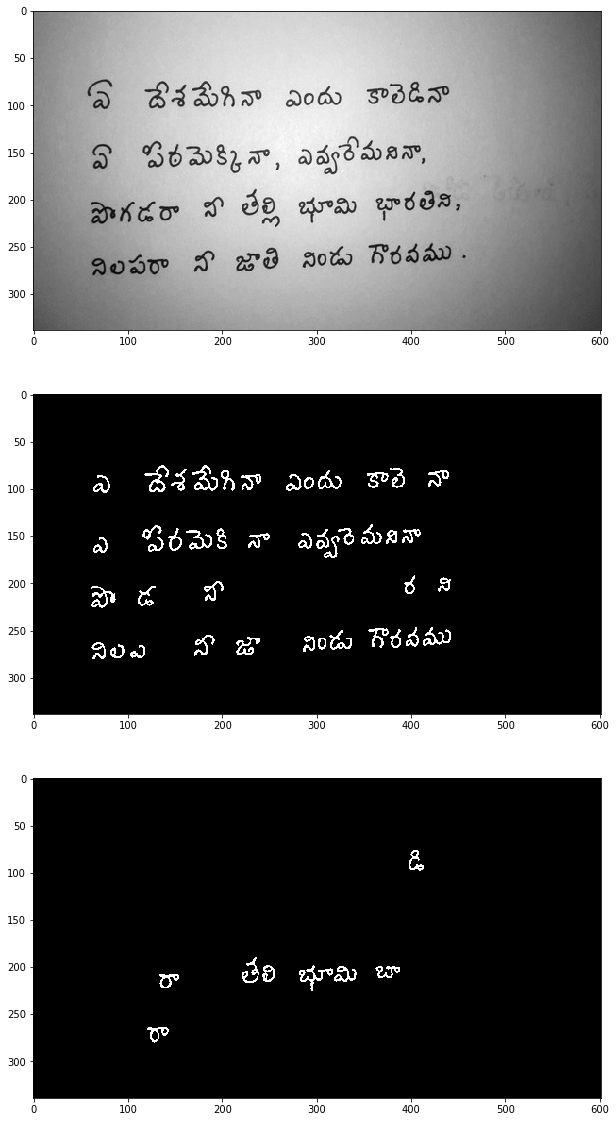

In [99]:
plt.figure(figsize=(20,20))
plt.subplot(311)
plt.imshow(im,cmap='gray')
plt.subplot(312)
plt.imshow(np.sum(onehole,axis=0),cmap='gray')
plt.subplot(313)
plt.imshow(np.sum(twohole,axis=0),cmap='gray')
plt.show()

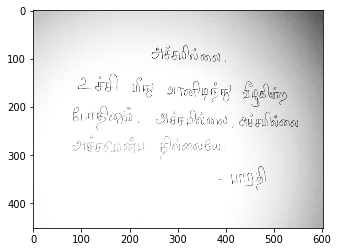

In [100]:
im2 = cv2.imread("../input_data/5_2b.jpeg",0)
plt.imshow(im2,cmap='gray')
# im2 = np.pad(im2, 3, mode='constant')

Components


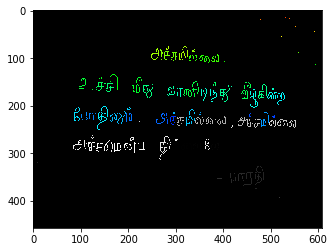

In [101]:
onehole,twohole = returnOneTwo(im2,1)

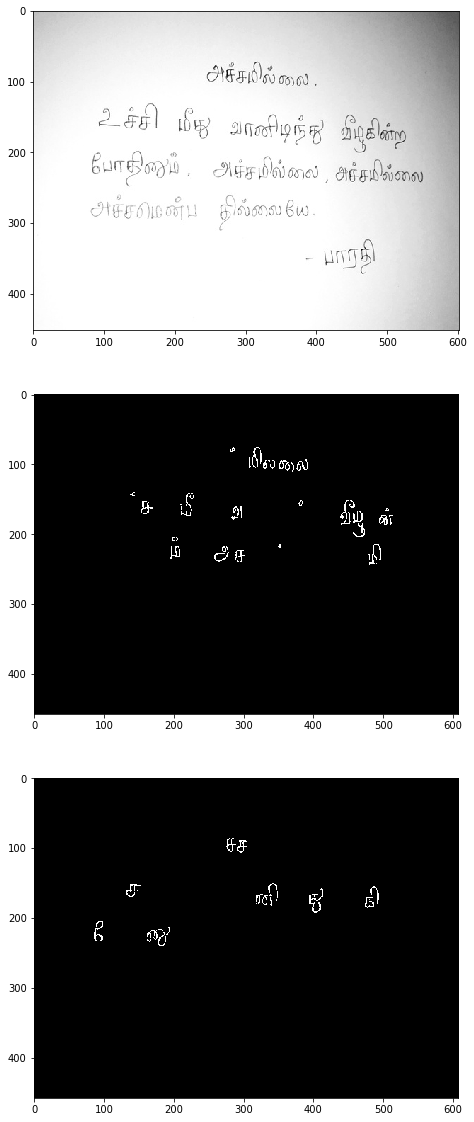

In [102]:
plt.figure(figsize=(20,20))
plt.subplot(311)
plt.imshow(im2,cmap='gray')
plt.subplot(312)
plt.imshow(np.sum(onehole,axis=0),cmap='gray')
plt.subplot(313)
plt.imshow(np.sum(twohole,axis=0),cmap='gray')
plt.show()